Position- Data Science Intern
Project Name
Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv(r'C:\Users\harsh\Downloads\loan prediction.csv', index_col="Index")

In [3]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0


In [4]:
# Checking null values 
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [5]:
# Renaming target variable
df.rename({'Defaulted?':'Defaulted'}, axis = 1, inplace = True)
df

,Employed,Bank Balance,Annual Salary,Defaulted
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0


In [6]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


In [8]:
# Checking class balance
fig = px.pie(df, values = df['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Have Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

In [9]:
# Separating df into two different groups: Employed clients and unemployed clients
employed = df.query("Employed == 1")
unemployed = df.query("Employed == 0")

In [10]:
# Checking class balance among those who are employed
fig = px.pie(employed, values = employed['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Are Employed and Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

In [11]:
# Checking class balance among those who are unemployed
fig = px.pie(unemployed, values = unemployed['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Are Unemployed and Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

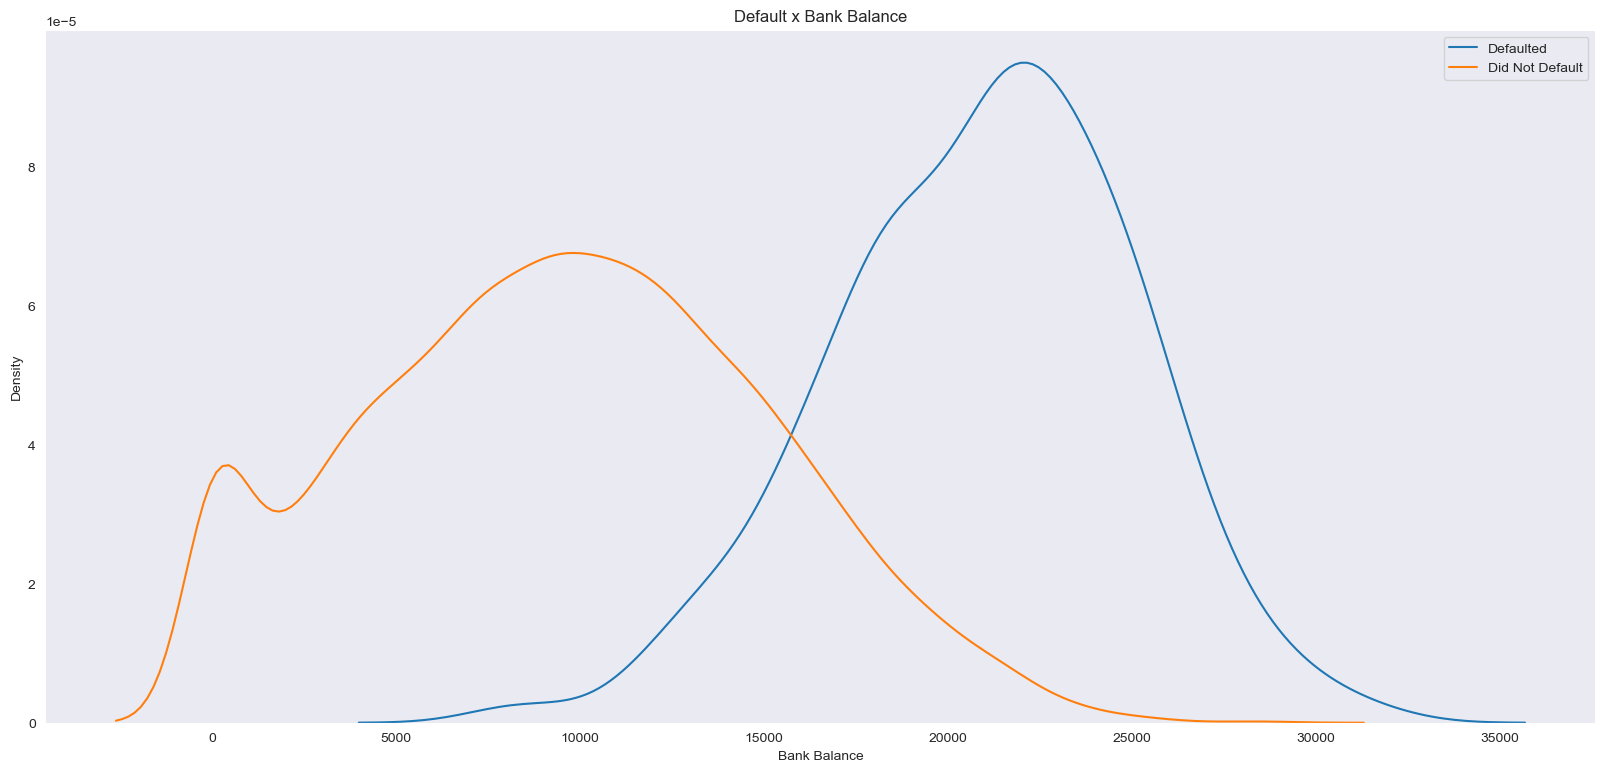

In [12]:
# Default distribution according to bank balance values
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Bank Balance'])
sns.kdeplot(df[df['Defaulted']==0]['Bank Balance'])
plt.title('Default x Bank Balance')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

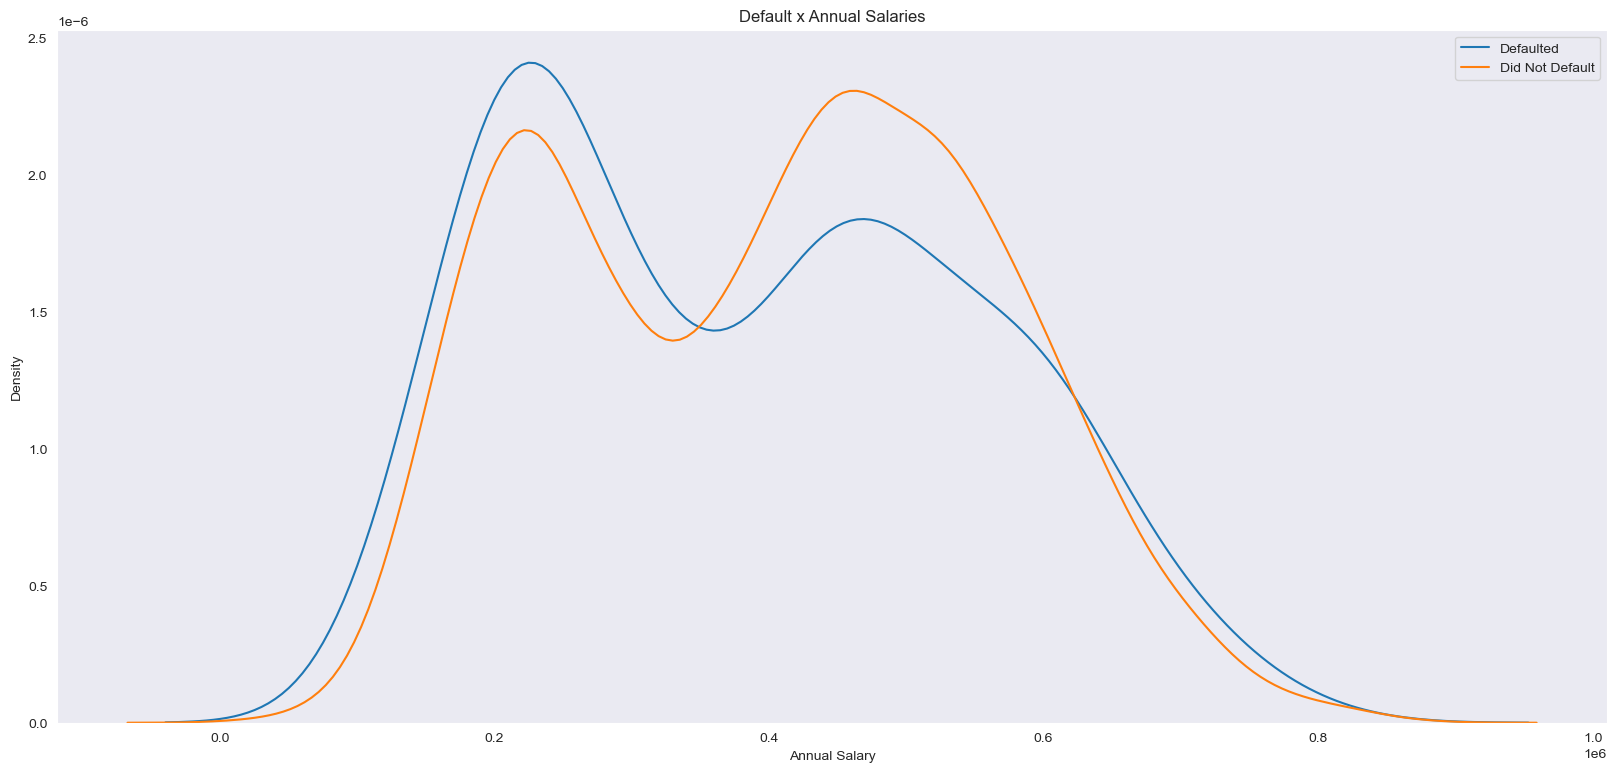

In [13]:
# Default distribution according to annual salaries
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Annual Salary'])
sns.kdeplot(df[df['Defaulted']==0]['Annual Salary'])
plt.title('Default x Annual Salaries')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

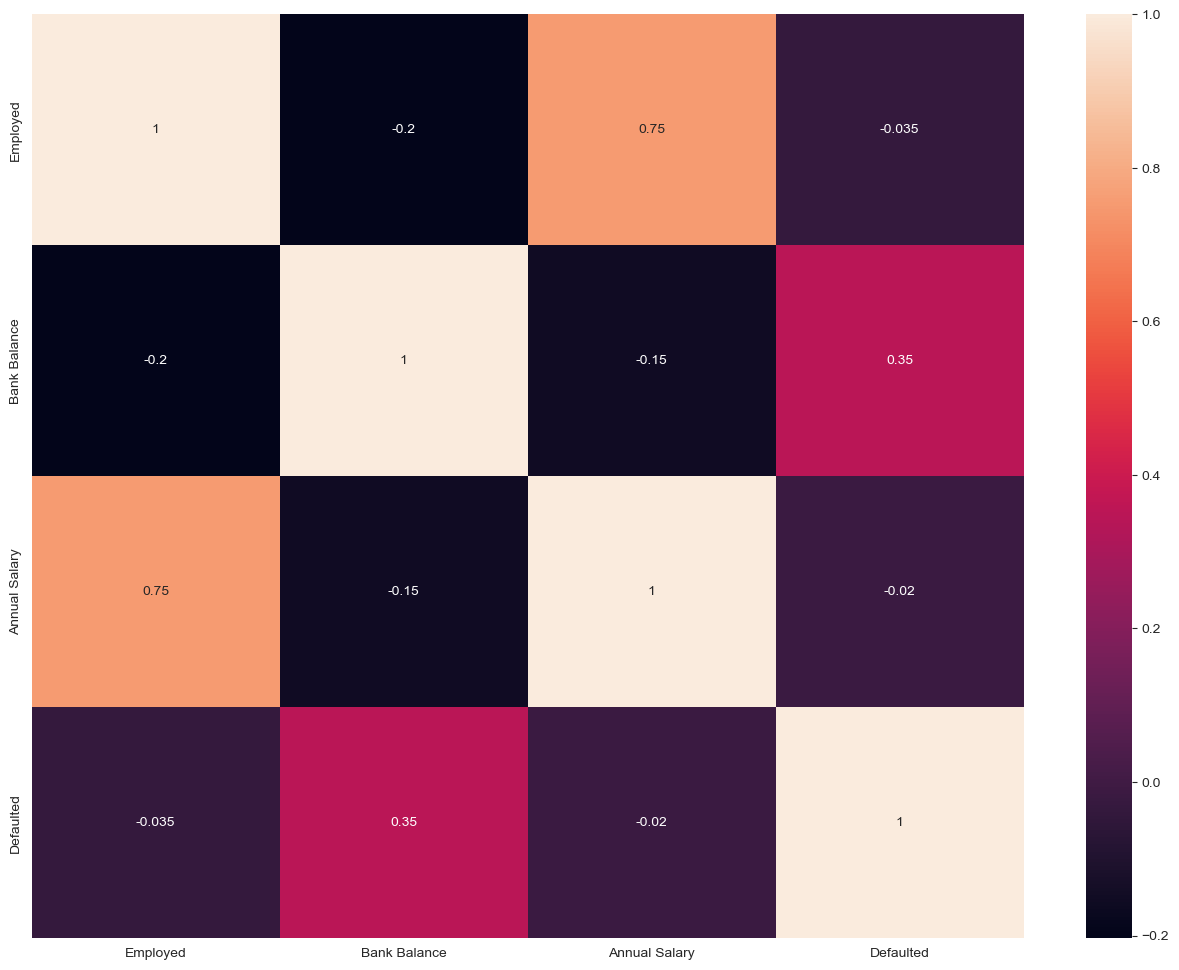

In [14]:
# Checking correlations
corr = df.corr()
plt.figure(figsize = (16, 12))
g = sns.heatmap(df.corr(), annot = True)

In [15]:
test = df.tail(2000) # 20% of dataset will be used for testing
test

,Employed,Bank Balance,Annual Salary,Defaulted
Index,,,,
8001,1,3649.80,286403.28,0
8002,1,4243.56,488241.12,0
8003,1,15233.04,468121.80,0
8004,0,4770.48,272530.44,0
8005,1,7286.04,594569.64,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0


In [16]:
# Removing testing data from dataframe and setting up 80% of data left for training and validation
train = df.drop(test.index)
train

,Employed,Bank Balance,Annual Salary,Defaulted
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
...,...,...,...,...
7996,1,8095.20,807347.40,0
7997,1,13173.12,506747.64,0
7998,1,7116.72,573451.20,0


In [17]:
test # testing set

,Employed,Bank Balance,Annual Salary,Defaulted
Index,,,,
8001,1,3649.80,286403.28,0
8002,1,4243.56,488241.12,0
8003,1,15233.04,468121.80,0
8004,0,4770.48,272530.44,0
8005,1,7286.04,594569.64,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0
